# Project - Ensemble Technique

# 1.  Import the necessary libraries

In [555]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from  sklearn import model_selection

import pylab as pl
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve,auc

from sklearn.neighbors import KNeighborsClassifier
from scipy.stats import zscore

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier,AdaBoostClassifier,GradientBoostingClassifier,RandomForestClassifier

from sklearn.metrics import f1_score

# 2. Read the data as a data frame

In [471]:
dataframe=pd.read_csv('bank-full.csv')

In [472]:
dataframe.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


# 3. Perform basic EDA

## 3(a) Shape of the data

In [473]:
dataframe.shape   #It consist of 45211 rows and 17 column

(45211, 17)

## 3(b) Data type of each attribute

In [474]:
dataframe.dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
Target       object
dtype: object

In [475]:
dataframe.info()   # 7 columns are numeric and 10 are string/categorial

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
age          45211 non-null int64
job          45211 non-null object
marital      45211 non-null object
education    45211 non-null object
default      45211 non-null object
balance      45211 non-null int64
housing      45211 non-null object
loan         45211 non-null object
contact      45211 non-null object
day          45211 non-null int64
month        45211 non-null object
duration     45211 non-null int64
campaign     45211 non-null int64
pdays        45211 non-null int64
previous     45211 non-null int64
poutcome     45211 non-null object
Target       45211 non-null object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


## 3(c) Checking the presence of missing values

In [476]:
dataframe.isnull().values.any()    #result will show if dataframe is having any null value , false means no null value

False

## 3(d) 5 point summary of numerical attributes

In [477]:
dataframe.describe()   #it will show mean,median and quantile distribution 
                          

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


## 3(e) Checking the presence of outliers

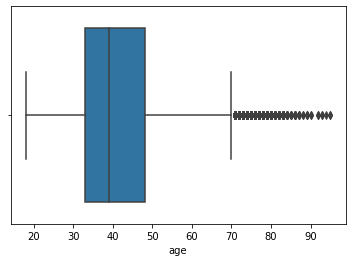

In [478]:
sns.boxplot(x=dataframe["age"])   # dark dots in Age refelcting presence of outiers

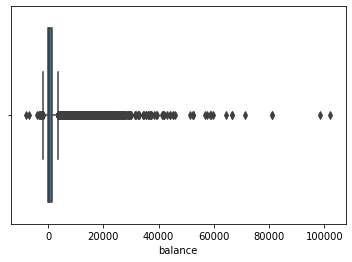

In [479]:
sns.boxplot(x=dataframe["balance"]) # huge number dark dots in balance refelcting presence of outiers

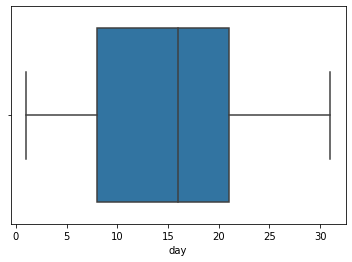

In [480]:
sns.boxplot(x=dataframe["day"]) # no outier

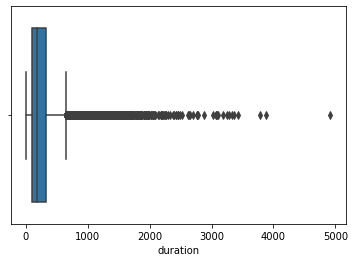

In [481]:
sns.boxplot(x=dataframe["duration"])  # huge number dark dots in duration refelcting presence of outiers

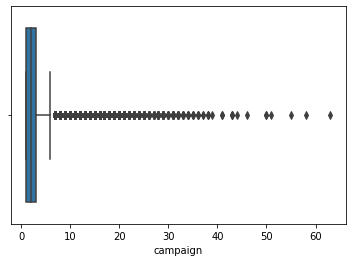

In [482]:
sns.boxplot(x=dataframe["campaign"])  # huge number dark dots in campaign refelcting presence of outiers

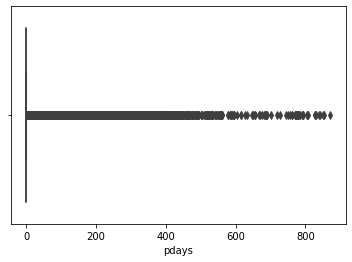

In [483]:
sns.boxplot(x=dataframe["pdays"])  # huge number dark dots in pdays refelcting presence of outiers

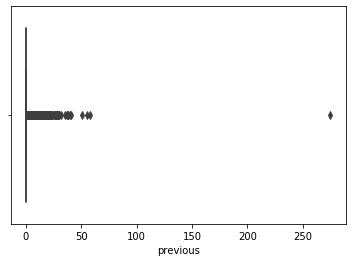

In [484]:
sns.boxplot(x=dataframe["previous"])  # huge number dark dots in previous refelcting presence of outiers

In [485]:
dataframe.corr()  # 

,age,balance,day,duration,campaign,pdays,previous
age,1.000000,0.097783,-0.009120,-0.004648,0.004760,-0.023758,0.001288
balance,0.097783,1.000000,0.004503,0.021560,-0.014578,0.003435,0.016674
day,-0.009120,0.004503,1.000000,-0.030206,0.162490,-0.093044,-0.051710
duration,-0.004648,0.021560,-0.030206,1.000000,-0.084570,-0.001565,0.001203
campaign,0.004760,-0.014578,0.162490,-0.084570,1.000000,-0.088628,-0.032855
pdays,-0.023758,0.003435,-0.093044,-0.001565,-0.088628,1.000000,0.454820
previous,0.001288,0.016674,-0.051710,0.001203,-0.032855,0.454820,1.000000


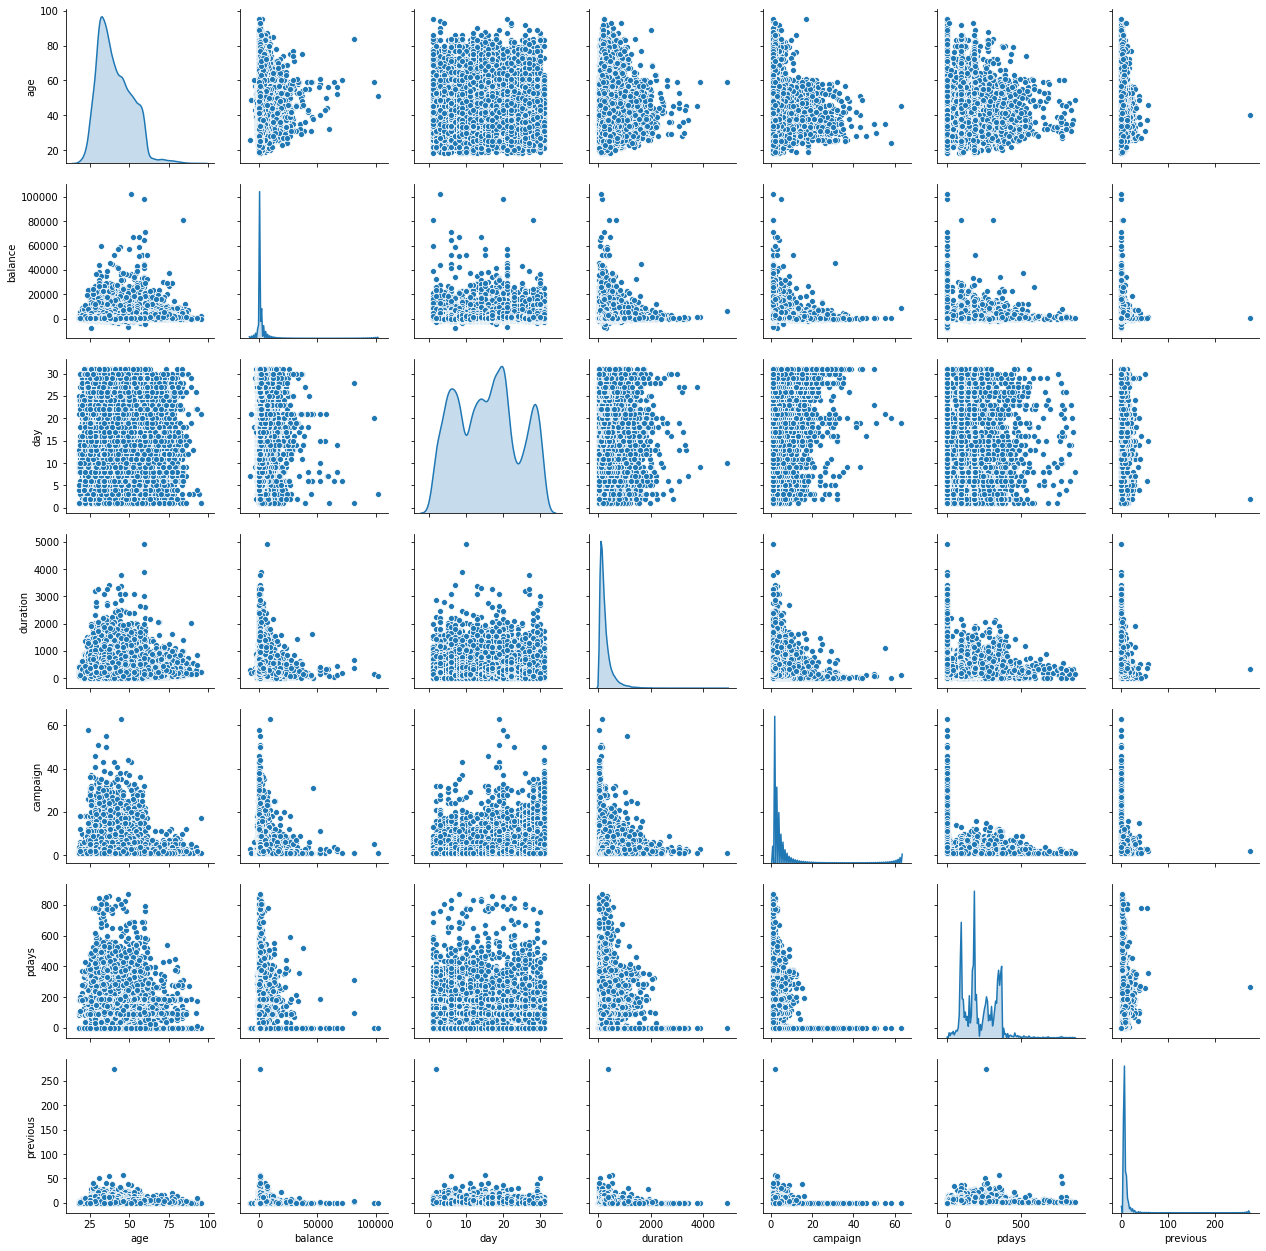

In [486]:
sns.pairplot(dataframe,diag_kind='kde')

#### Data  Cleaning - to prepare for model training

In [488]:
dataframe = pd.get_dummies(dataframe, columns=['job','education','marital'])
dataframe['Target'] = dataframe['Target'].map({'yes':1, 'no':0})
dataframe['housing'] = dataframe['housing'].map({'yes':1, 'no':0})
dataframe['default'] = dataframe['default'].map({'yes':1, 'no':0})
dataframe['loan'] = dataframe['loan'].map({'yes':1, 'no':0})
dataframe['month'] = dataframe['month'].map({'jan':1, 'feb':2, 'mar':3, 'apr':4, 'may':5, 'jun':6, 'jul':7 , 'aug':8, 'sep':8 
                                            , 'oct':10 , 'nov':11 , 'dec':12})
dataframe['contact'] = dataframe['contact'].map({'unknown':0, 'cellular':1 ,'telephone' : 2})

dataframe = dataframe.drop(dataframe[dataframe.poutcome == 'other' ].index, axis = 0, inplace = False)
dataframe['poutcome'] = dataframe['poutcome'].map({'unknown':-1, 'failure':0 ,'success' : 1})

In [489]:
dataframe.head()

,age,default,balance,housing,loan,contact,day,month,duration,campaign,...,job_technician,job_unemployed,job_unknown,education_primary,education_secondary,education_tertiary,education_unknown,marital_divorced,marital_married,marital_single
0,58,0,2143,1,0,0,5,5,261,1,...,0,0,0,0,0,1,0,0,1,0
1,44,0,29,1,0,0,5,5,151,1,...,1,0,0,0,1,0,0,0,0,1
2,33,0,2,1,1,0,5,5,76,1,...,0,0,0,0,1,0,0,0,1,0
3,47,0,1506,1,0,0,5,5,92,1,...,0,0,0,0,0,0,1,0,1,0
4,33,0,1,0,0,0,5,5,198,1,...,0,0,1,0,0,0,1,0,0,1


In [490]:
dataframe.info()   # All columns values are now cleaned and numeric

<class 'pandas.core.frame.DataFrame'>
Int64Index: 43371 entries, 0 to 45209
Data columns (total 33 columns):
age                    43371 non-null int64
default                43371 non-null int64
balance                43371 non-null int64
housing                43371 non-null int64
loan                   43371 non-null int64
contact                43371 non-null int64
day                    43371 non-null int64
month                  43371 non-null int64
duration               43371 non-null int64
campaign               43371 non-null int64
pdays                  43371 non-null int64
previous               43371 non-null int64
poutcome               43371 non-null int64
Target                 43371 non-null int64
job_admin.             43371 non-null uint8
job_blue-collar        43371 non-null uint8
job_entrepreneur       43371 non-null uint8
job_housemaid          43371 non-null uint8
job_management         43371 non-null uint8
job_retired            43371 non-null uint8
job_self-em

# 4. Prepare the data to train a model

In [491]:
X = dataframe.drop('Target',axis=1)
Y=dataframe['Target']

In [495]:
x_train, x_test, y_train, y_test = train_test_split (X ,Y , test_size = 0.3 , random_state = 1)

In [496]:
y_trainT=len(y_train.loc[y_train[:] == True])
y_trainF=len(y_train.loc[y_train[:] == False ])
print("Number of Subscribered Cases in training : {0} ({1:2.2f}%)".format(y_trainT,(y_trainT/(y_trainT + y_trainF))*100))
print("Number of Not Subscribered Cases in taining: {0} ({1:2.2f}%)".format(y_trainF,(y_trainF/(y_trainT + y_trainF))*100))

Number of Subscribered Cases in training : 3520 (11.59%)
Number of Not Subscribered Cases in taining: 26839 (88.41%)


In [497]:
y_testT=len(y_test.loc[y_test[:] == True])
y_testF=len(y_test.loc[y_test[:] == False])
print("Number of Subscribered Cases in test : {0} ({1:2.2f}%)".format(y_testT,(y_testT/(y_testT + y_testF))*100))
print("Number of Not Subscribered Cases in test: {0} ({1:2.2f}%)".format(y_testF,(y_testF/(y_testT + y_testF))*100))

Number of Subscribered Cases in test : 1462 (11.24%)
Number of Not Subscribered Cases in test: 11550 (88.76%)


In [498]:
x_train.head()

,age,default,balance,housing,loan,contact,day,month,duration,campaign,...,job_technician,job_unemployed,job_unknown,education_primary,education_secondary,education_tertiary,education_unknown,marital_divorced,marital_married,marital_single
30301,39,0,1846,0,0,1,5,2,306,5,...,1,0,0,1,0,0,0,0,1,0
33154,52,0,1430,1,0,2,20,4,121,4,...,0,0,0,0,1,0,0,1,0,0
6496,37,0,-349,1,0,0,27,5,319,5,...,0,0,0,0,1,0,0,0,1,0
25380,43,0,508,1,0,1,18,11,200,1,...,0,0,0,0,1,0,0,0,1,0
13543,33,0,-384,1,0,1,9,7,125,1,...,0,0,0,0,1,0,0,0,1,0


# 5. Train a few standard classification algorithms, note and comment on their performances along different metrics

5.1) **Logistic Classification**

In [499]:
from sklearn import metrics

from sklearn.linear_model import LogisticRegression

# Fit the model on train
model = LogisticRegression(solver="liblinear")
model.fit(x_train, y_train)
probas1_Logistic= model.fit(x_train, y_train).predict_proba(x_test)
#predict on test
y_predict = model.predict(x_test)


coef_df = pd.DataFrame(model.coef_)
coef_df['intercept'] = model.intercept_
print(coef_df)

          0         1         2         3        4         5         6  \
0 -0.001933 -0.028881  0.000021 -0.795966 -0.58054  0.647377 -0.005299   

          7         8         9  ...        23       24        25        26  \
0 -0.023542  0.004149 -0.105676  ... -0.097036 -0.15641 -0.462594 -0.278139   

         27       28        29        30        31  intercept  
0 -0.075897 -0.25784 -0.362974 -0.528109 -0.183386  -1.074469  

[1 rows x 33 columns]


In [500]:

fpr1,tpr1,threshold1 = roc_curve(y_test,probas1_Logistic[:,1])

roc_auc_logistic = auc(fpr1,tpr1)
#probas1_Logistic


In [501]:
roc_auc_logistic

0.8882467828569061

In [502]:
model_score = model.score(x_test, y_test)
print(model_score)
print(model.score(x_train, y_train))

0.9027051952044267
0.901446029184097


[[  481   981]
 [  285 11265]]


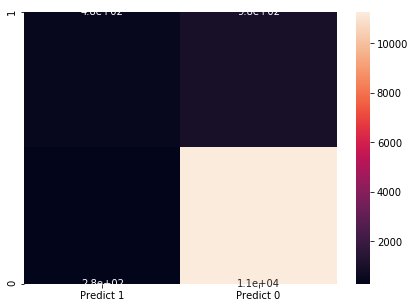

In [503]:
cm_log=metrics.confusion_matrix(y_test, y_predict, labels=[1, 0])

print(cm_log)
df_cm_log = pd.DataFrame(cm_log, index = [i for i in ["1","0"]],
                  columns = [i for i in ["Predict 1","Predict 0"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm_log, annot=True)

### 5.2 Naive Bayes Algo

In [504]:
from sklearn.naive_bayes import GaussianNB # using Gaussian algorithm from Naive Bayes

# creatw the model
model_Naive = GaussianNB()

model_Naive.fit(x_train, y_train.ravel())
probas1_Naive= model_Naive.fit(x_train, y_train).predict_proba(x_test)

In [505]:
probas1_Naive

array([[9.99966489e-01, 3.35114396e-05],
       [9.32827038e-01, 6.71729620e-02],
       [9.99982620e-01, 1.73799039e-05],
       ...,
       [6.77697437e-01, 3.22302563e-01],
       [9.99001192e-01, 9.98808028e-04],
       [9.98728115e-01, 1.27188476e-03]])

In [506]:
Naive_train_predict = model_Naive.predict(x_train)


print("Model Accuracy: {0:.4f}".format(metrics.accuracy_score(y_train, Naive_train_predict)))


Model Accuracy: 0.8271


In [507]:
 Naive_test_predict = model_Naive.predict(x_test)

print("Model Accuracy on test data: {0:.4f}".format(metrics.accuracy_score(y_test, Naive_test_predict)))
print()


Model Accuracy on test data: 0.8221



In [508]:
Naive_score = model_Naive.score(x_test, y_test)
print(Naive_score)

0.822087304027052


Confusion Matrix
[[ 766  696]
 [1619 9931]]


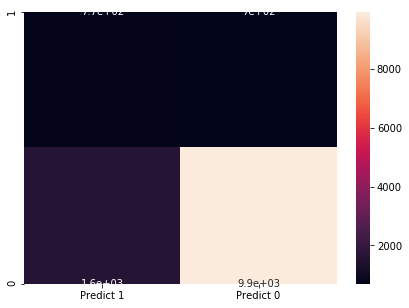

In [509]:
print("Confusion Matrix")
cm_naive=metrics.confusion_matrix(y_test, Naive_test_predict, labels=[1, 0])

print(cm_naive)
df_cm_naive = pd.DataFrame(cm_naive, index = [i for i in ["1","0"]],
                  columns = [i for i in ["Predict 1","Predict 0"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm_naive, annot=True)

In [510]:
fpr2,tpr2,threshold2 = roc_curve(y_test,probas1_Naive[:,1])

roc_auc_Naive = auc(fpr2,tpr2)
#probas1_Naive
roc_auc_Naive


0.7994538703430634

# KNN

In [511]:
XScaled  = X.apply(zscore)  # convert all attributes to Z scale 

XScaled.describe()

,age,default,balance,housing,loan,contact,day,month,duration,campaign,...,job_technician,job_unemployed,job_unknown,education_primary,education_secondary,education_tertiary,education_unknown,marital_divorced,marital_married,marital_single
count,4.337100e+04,4.337100e+04,4.337100e+04,4.337100e+04,4.337100e+04,4.337100e+04,4.337100e+04,4.337100e+04,4.337100e+04,4.337100e+04,...,4.337100e+04,4.337100e+04,4.337100e+04,4.337100e+04,4.337100e+04,4.337100e+04,4.337100e+04,4.337100e+04,4.337100e+04,4.337100e+04
mean,3.224155e-16,-3.931896e-17,9.174424e-18,-2.621264e-17,4.718275e-17,-1.992161e-16,4.521680e-17,7.863792e-17,9.305487e-17,-1.048506e-17,...,5.308059e-17,-2.359138e-17,2.817859e-17,-6.684223e-17,-7.994855e-17,-1.166462e-16,7.863792e-18,1.638290e-17,2.621264e-17,8.125918e-17
std,1.000012e+00,1.000012e+00,1.000012e+00,1.000012e+00,1.000012e+00,1.000012e+00,1.000012e+00,1.000012e+00,1.000012e+00,1.000012e+00,...,1.000012e+00,1.000012e+00,1.000012e+00,1.000012e+00,1.000012e+00,1.000012e+00,1.000012e+00,1.000012e+00,1.000012e+00,1.000012e+00
min,-2.169488e+00,-1.369971e-01,-3.093437e+00,-1.109513e+00,-4.379188e-01,-1.378790e+00,-1.785543e+00,-2.187856e+00,-1.001238e+00,-5.661763e-01,...,-4.497910e-01,-1.734004e-01,-8.147417e-02,-4.239267e-01,-1.024723e+00,-6.455267e-01,-2.076022e-01,-3.603271e-01,-1.236853e+00,-6.241845e-01
25%,-7.537700e-01,-1.369971e-01,-4.246112e-01,-1.109513e+00,-4.379188e-01,-1.378790e+00,-9.446035e-01,-4.930827e-01,-6.019322e-01,-5.661763e-01,...,-4.497910e-01,-1.734004e-01,-8.147417e-02,-4.239267e-01,-1.024723e+00,-6.455267e-01,-2.076022e-01,-3.603271e-01,-1.236853e+00,-6.241845e-01
50%,-1.874828e-01,-1.369971e-01,-3.015463e-01,9.012965e-01,-4.379188e-01,4.274050e-01,1.646994e-02,-6.938952e-02,-3.034219e-01,-2.475038e-01,...,-4.497910e-01,-1.734004e-01,-8.147417e-02,-4.239267e-01,9.758737e-01,-6.455267e-01,-2.076022e-01,-3.603271e-01,8.085033e-01,-6.241845e-01
75%,6.619479e-01,-1.369971e-01,1.980815e-02,9.012965e-01,-4.379188e-01,4.274050e-01,6.171408e-01,7.779969e-01,2.315706e-01,7.116881e-02,...,-4.497910e-01,-1.734004e-01,-8.147417e-02,-4.239267e-01,9.758737e-01,1.549122e+00,-2.076022e-01,-3.603271e-01,8.085033e-01,1.602091e+00
max,5.097864e+00,7.299425e+00,3.324733e+01,9.012965e-01,2.283528e+00,2.233600e+00,1.818483e+00,2.472770e+00,1.806466e+01,1.919152e+01,...,2.223255e+00,5.767000e+00,1.227383e+01,2.358898e+00,9.758737e-01,1.549122e+00,4.816904e+00,2.775256e+00,8.085033e-01,1.602091e+00


In [512]:
X_train, X_test, Y_train, Y_test = train_test_split(XScaled, Y, test_size=0.30, random_state=1)

In [513]:
NNH_model = KNeighborsClassifier(n_neighbors= 5, weights = 'distance' )


In [514]:
NNH_model.fit(X_train, Y_train)
probas1_NNH= NNH_model.fit(X_train, Y_train).predict_proba(X_test)

In [515]:
probas1_NNH

array([[1.        , 0.        ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       ...,
       [0.83813486, 0.16186514],
       [1.        , 0.        ],
       [1.        , 0.        ]])

In [516]:
predicted_labels = NNH_model.predict(X_test)
NNH_score=NNH_model.score(X_test, Y_test)
print(NNH_score)

0.8936366430986782


Confusion Matrix for KNN Regression:
[[  446  1016]
 [  368 11182]]


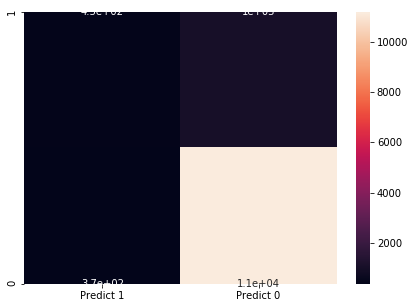

In [517]:
# calculate accuracy measures and confusion matrix
print("Confusion Matrix for KNN Regression:")
cm_KNN=metrics.confusion_matrix(Y_test, predicted_labels, labels=[1, 0])

print(cm_KNN) 
df_cm_KNN = pd.DataFrame(cm_KNN, index = [i for i in [1,0]],
                  columns = [i for i in ["Predict 1","Predict 0"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm_KNN, annot=True)

In [518]:
fpr3,tpr3,threshold3 = roc_curve(Y_test,probas1_NNH[:,1])

roc_auc_NNH = auc(fpr3,tpr3)
#probas1_Naive
roc_auc_NNH

0.804662710750262

# 6. Build the ensemble models and compare the results with the base models.

In [519]:
dataframe.head(2)

,age,default,balance,housing,loan,contact,day,month,duration,campaign,...,job_technician,job_unemployed,job_unknown,education_primary,education_secondary,education_tertiary,education_unknown,marital_divorced,marital_married,marital_single
0,58,0,2143,1,0,0,5,5,261,1,...,0,0,0,0,0,1,0,0,1,0
1,44,0,29,1,0,0,5,5,151,1,...,1,0,0,0,1,0,0,0,0,1


In [520]:
#print(dataframe.job.value_counts())
#print(dataframe.marital.value_counts())
#print(dataframe.education.value_counts())
print(dataframe.default.value_counts())
print(dataframe.housing.value_counts())
print(dataframe.loan.value_counts())
print(dataframe.contact.value_counts())
print(dataframe.poutcome.value_counts())
print(dataframe.Target.value_counts())


0    42572
1      799
Name: default, dtype: int64
1    23931
0    19440
Name: housing, dtype: int64
0    36392
1     6979
Name: loan, dtype: int64
1    27648
0    12993
2     2730
Name: contact, dtype: int64
-1    36959
 0     4901
 1     1511
Name: poutcome, dtype: int64
0    38389
1     4982
Name: Target, dtype: int64


### CART - Decision Tree

In [521]:
dTree = DecisionTreeClassifier(criterion='gini',max_depth=3,random_state=1)
dTree.fit(x_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=1, splitter='best')

In [522]:
print(dTree.score(x_train, y_train))
dTree_score=dTree.score(x_test, y_test)
print(dTree_score)

0.9046081886755163
0.9030894558868736


In [523]:
print(pd.DataFrame(dTree.feature_importances_,columns=['imp'],index=x_train.columns))

                          imp
age                  0.061983
default              0.000000
balance              0.000000
housing              0.000000
loan                 0.000000
contact              0.000000
day                  0.000000
month                0.000000
duration             0.569340
campaign             0.000000
pdays                0.000000
previous             0.000000
poutcome             0.363238
job_admin.           0.000000
job_blue-collar      0.000000
job_entrepreneur     0.000000
job_housemaid        0.000000
job_management       0.000000
job_retired          0.000000
job_self-employed    0.000000
job_services         0.000000
job_student          0.000000
job_technician       0.000000
job_unemployed       0.000000
job_unknown          0.000000
education_primary    0.000000
education_secondary  0.000000
education_tertiary   0.000000
education_unknown    0.000000
marital_divorced     0.000000
marital_married      0.005440
marital_single       0.000000


Confusion Matrix
[[  502   960]
 [  301 11249]]


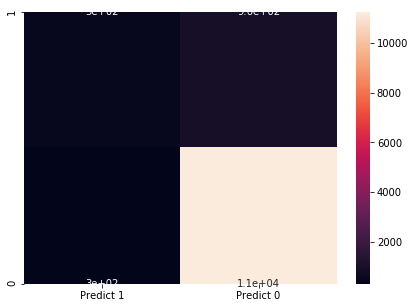

In [524]:
tree_predict=dTree.predict(x_test)
print("Confusion Matrix")
cm_tree=metrics.confusion_matrix(y_test, tree_predict, labels=[1, 0])

print(cm_tree)
df_cm_tree = pd.DataFrame(cm_tree, index = [i for i in ["1","0"]],
                  columns = [i for i in ["Predict 1","Predict 0"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm_tree, annot=True)

In [525]:
probas1_dtree= dTree.fit(x_train, y_train).predict_proba(x_test)
fpr4,tpr4,threshold4 = roc_curve(y_test,probas1_dtree[:,1])

roc_auc_dtree = auc(fpr4,tpr4)
print(roc_auc_dtree)

0.7672074368859594


### Ensemble Learning -Bagging

In [526]:
dTreeOld = DecisionTreeClassifier(criterion='gini',random_state=1)
bgc1=BaggingClassifier(base_estimator=dTreeOld,n_estimators=50,random_state=1)
bgc1.fit(x_train,y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(class_weight=None,
                                                        criterion='gini',
                                                        max_depth=None,
                                                        max_features=None,
                                                        max_leaf_nodes=None,
                                                        min_impurity_decrease=0.0,
                                                        min_impurity_split=None,
                                                        min_samples_leaf=1,
                                                        min_samples_split=2,
                                                        min_weight_fraction_leaf=0.0,
                                                        presort=False,
                                                        random_state=1,
                                                        splitter='best'),
       

0.9063940977559176
Confusion Matrix
[[  695   767]
 [  451 11099]]


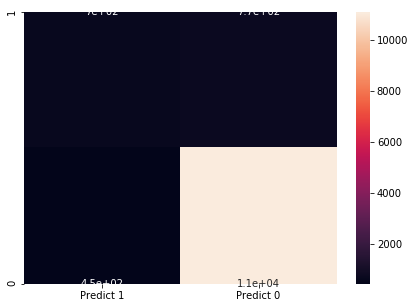

In [527]:
bagg_predict=bgc1.predict(x_test)
bgc1_score=bgc1.score(x_test,y_test)
print(bgc1_score)

print("Confusion Matrix")
cm_bagg=metrics.confusion_matrix(y_test, bagg_predict, labels=[1, 0])

print(cm_bagg)
df_cm_bagg = pd.DataFrame(cm_bagg, index = [i for i in ["1","0"]],
                  columns = [i for i in ["Predict 1","Predict 0"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm_bagg, annot=True)

In [528]:
probas1_bagg= bgc1.fit(x_train, y_train).predict_proba(x_test)
fpr5,tpr5,threshold5 = roc_curve(y_test,probas1_bagg[:,1])

roc_auc_bagg = auc(fpr5,tpr5)
print(roc_auc_bagg)

0.9193661650706795


### Ensemble Learning - AdaBoosting

In [529]:
abc1=AdaBoostClassifier(base_estimator=dTree,n_estimators=10,random_state=1)
abc1.fit(x_train,y_train)

AdaBoostClassifier(algorithm='SAMME.R',
                   base_estimator=DecisionTreeClassifier(class_weight=None,
                                                         criterion='gini',
                                                         max_depth=3,
                                                         max_features=None,
                                                         max_leaf_nodes=None,
                                                         min_impurity_decrease=0.0,
                                                         min_impurity_split=None,
                                                         min_samples_leaf=1,
                                                         min_samples_split=2,
                                                         min_weight_fraction_leaf=0.0,
                                                         presort=False,
                                                         random_state=1,
                                

0.9024746387949585
Confusion Matrix
[[  570   892]
 [  377 11173]]


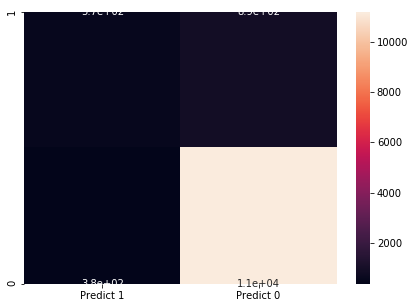

In [530]:
abc_predict=abc1.predict(x_test)
abc1_score=abc1.score(x_test,y_test)
print(abc1_score)

print("Confusion Matrix")
cm_abc=metrics.confusion_matrix(y_test, abc_predict, labels=[1, 0])

print(cm_abc)
df_cm_abc = pd.DataFrame(cm_abc, index = [i for i in ["1","0"]],
                  columns = [i for i in ["Predict 1","Predict 0"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm_abc, annot=True)

In [531]:
probas1_abc1= abc1.fit(x_train, y_train).predict_proba(x_test)
fpr6,tpr6,threshold6 = roc_curve(y_test,probas1_abc1[:,1])

roc_auc_abc1 = auc(fpr6,tpr6)
print(roc_auc_abc1)

0.918315981783834


### Ensemble Learning - Gradient Boosting

In [532]:
gbc1=GradientBoostingClassifier(n_estimators=50,random_state=1)
gbc1.fit(x_train,y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=50,
                           n_iter_no_change=None, presort='auto',
                           random_state=1, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

0.9064709498924071
Confusion Matrix
[[  548   914]
 [  303 11247]]


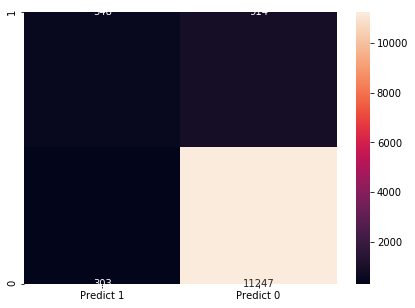

In [533]:
gbc_predict=gbc1.predict(x_test)
gbc1_score=gbc1.score(x_test,y_test)
print(gbc1_score)

print("Confusion Matrix")
cm_gbc=metrics.confusion_matrix(y_test, gbc_predict, labels=[1, 0])

print(cm_gbc)
df_cm_gbc = pd.DataFrame(cm_gbc, index = [i for i in ["1","0"]],
                  columns = [i for i in ["Predict 1","Predict 0"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm_gbc, annot=True,fmt='g')

In [534]:
probas1_gbc1= gbc1.fit(x_train, y_train).predict_proba(x_test)
fpr7,tpr7,threshold7 = roc_curve(y_test,probas1_gbc1[:,1])

roc_auc_gbc1 = auc(fpr7,tpr7)
print(roc_auc_gbc1)

0.9124404391777853


### Ensemble Learning - Random Forest 

In [535]:
rfc1=RandomForestClassifier(n_estimators=50,random_state=1,max_features=15)
rfc1.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features=15, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=50,
                       n_jobs=None, oob_score=False, random_state=1, verbose=0,
                       warm_start=False)

0.9070857669843222
Confusion Matrix
[[  652   810]
 [  399 11151]]


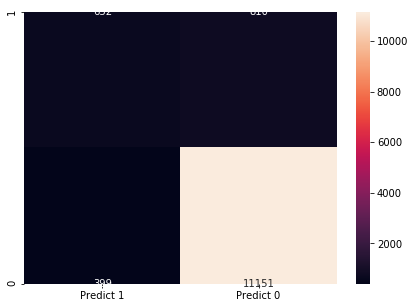

In [536]:
rfc_predict=rfc1.predict(x_test)
rfc1_score=rfc1.score(x_test,y_test)
print(rfc1_score)

print("Confusion Matrix")
cm_rfc=metrics.confusion_matrix(y_test, rfc_predict, labels=[1, 0])

print(cm_rfc)
df_cm_rfc = pd.DataFrame(cm_rfc, index = [i for i in ["1","0"]],
                  columns = [i for i in ["Predict 1","Predict 0"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm_rfc, annot=True,fmt='g')

In [537]:
probas1_rfc1= rfc1.fit(x_train, y_train).predict_proba(x_test)
fpr8,tpr8,threshold8 = roc_curve(y_test,probas1_rfc1[:,1])

roc_auc_rfc1 = auc(fpr8,tpr8)
print(roc_auc_rfc1)

0.9220985603543743


#  7. Compare performances of all the models

In [538]:
print(model_score)
print("confusion matrix for logistic Regression : \n{} ".format(cm_log))

0.9027051952044267
confusion matrix for logistic Regression : 
[[  481   981]
 [  285 11265]] 


In [539]:
print(Naive_score)
print("confusion matrix for Naive Regression : \n{} ".format(cm_naive))

0.822087304027052
confusion matrix for Naive Regression : 
[[ 766  696]
 [1619 9931]] 


In [547]:
print(NNH_score)
print("confusion matrix for KNN Regression : \n{} ".format(cm_KNN))

0.8936366430986782
confusion matrix for KNN Regression : 
[[  446  1016]
 [  368 11182]] 


In [548]:
print(dTree_score)
print("confusion matrix for decision Tree Regression : \n{} ".format(cm_tree))

0.9030894558868736
confusion matrix for decision Tree Regression : 
[[  502   960]
 [  301 11249]] 


In [549]:
print(bgc1_score)
print("confusion matrix for bagging Regression : \n{} ".format(cm_bagg))

0.9063940977559176
confusion matrix for decision Tree Regression : 
[[  695   767]
 [  451 11099]] 


In [550]:
print(abc1_score)
print("confusion matrix for adaboosting Regression : \n{} ".format(cm_abc))

0.9024746387949585
confusion matrix for adaboosting Regression : 
[[  570   892]
 [  377 11173]] 


In [551]:
print(gbc1_score)
print("confusion matrix for gradient boosting Regression : \n{} ".format(cm_gbc))

0.9064709498924071
confusion matrix for gradient boosting Regression : 
[[  548   914]
 [  303 11247]] 


In [552]:
print(rfc1_score)
print("confusion matrix for Random Forest Regression : \n{} ".format(cm_rfc))

0.9070857669843222
confusion matrix for Random Forest Regression : 
[[  652   810]
 [  399 11151]] 


In [559]:
def scorer(model,model_Naive,dTree,bgc1,abc1,gbc1,rfc1):
    for every in (model,model_Naive,dTree,bgc1,abc1,gbc1,rfc1):
        every.fit(x_train,y_train)
        print (every.__class__.__name__, 'F1 score =', f1_score(y_test,every.predict(x_test)))
scorer (model,model_Naive,dTree,bgc1,abc1,gbc1,rfc1)
NNH_model.fit(X_train,Y_train)
print (NNH_model.__class__.__name__, 'F1 score =', f1_score(Y_test,NNH_model.predict(X_test)))

LogisticRegression F1 score = 0.4317773788150808
GaussianNB F1 score = 0.3982323888744476
DecisionTreeClassifier F1 score = 0.44326710816777043
BaggingClassifier F1 score = 0.5329754601226993
AdaBoostClassifier F1 score = 0.473225404732254
GradientBoostingClassifier F1 score = 0.4738434932987462
RandomForestClassifier F1 score = 0.5189017111022682
KNeighborsClassifier F1 score = 0.39191564147627417


**Bagging** and **RandomForest** both are having good F1 score.

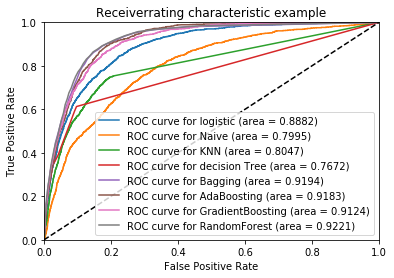

In [560]:
pl.clf()
pl.plot(fpr1, tpr1, label='ROC curve for logistic (area = %0.4f)' % roc_auc_logistic)
pl.plot(fpr2, tpr2, label='ROC curve for Naive (area = %0.4f)' % roc_auc_Naive)
pl.plot(fpr3, tpr3, label='ROC curve for KNN (area = %0.4f)' % roc_auc_NNH)
pl.plot(fpr4, tpr4, label='ROC curve for decision Tree (area = %0.4f)' % roc_auc_dtree)
pl.plot(fpr5, tpr5, label='ROC curve for Bagging (area = %0.4f)' % roc_auc_bagg)
pl.plot(fpr6, tpr6, label='ROC curve for AdaBoosting (area = %0.4f)' % roc_auc_abc1)
pl.plot(fpr7, tpr7, label='ROC curve for GradientBoosting (area = %0.4f)' % roc_auc_gbc1)
pl.plot(fpr8, tpr8, label='ROC curve for RandomForest (area = %0.4f)' % roc_auc_rfc1)
pl.plot([0, 1], [0, 1], 'k--')
pl.xlim([0.0, 1.0])
pl.ylim([0.0, 1.0])
pl.xlabel('False Positive Rate')
pl.ylabel('True Positive Rate')
pl.title('Receiverrating characteristic example')
pl.legend(loc="lower right")
pl.show()

Since **RandomForest** is showing **good ROC** and **accuracy** it can be considered as best fit Modal out of all. Since ROC is independent of skewness of different classes and ratio of test and train sample. Result of ROC is considered as more genralize to fit.

If we see at F1 score, then **bagging classifier** and **Random Forest classifier** both are comparable. It will depend upon the bussiness case to go for on of them.
